In [2]:
import tensorflow as tf
print(tf.__version__)


2.18.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted Bounding Box: [0.34271097 0.32913762 0.60914475 0.62231314]


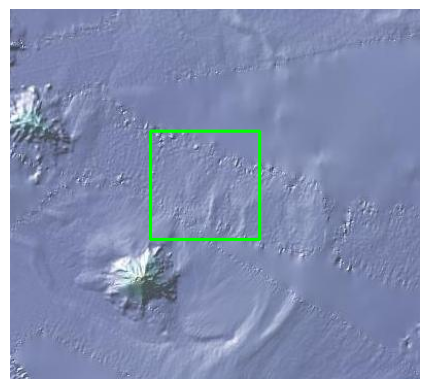

In [7]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Constants
IMAGE_SIZE = (256, 256)  # Same size used during training

# Function to load and preprocess image (same as training)
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color (BGR format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
    image = cv2.resize(image, IMAGE_SIZE)  # Resize to match input size for the model
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image

# Define Huber loss
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= delta
    small_error_loss = 0.5 * tf.square(error)
    large_error_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(is_small_error, small_error_loss, large_error_loss)

# Function to load the saved model
def load_trained_model(model_path):
    return load_model(model_path)

# Load the model and pass the custom loss function
model = load_model('objdet_standalone_1_0_model.h5', custom_objects={'huber_loss': huber_loss})

# Load and preprocess the image you want to make predictions on
img_path = 'tile_35.9_36.7_-58.0_-57.0.png'  # Provide the path to your new image
image = load_image(img_path)

# Expand dimensions to match the model input (batch size of 1)
image = np.expand_dims(image, axis=0)

# Make a prediction
predicted_bbox = model.predict(image)

# Post-process the predicted bounding box (optional)
# If you need to convert the bounding box back to pixel coordinates
# (assuming your images were resized to 256x256, you would scale back accordingly)

print(f"Predicted Bounding Box: {predicted_bbox[0]}")

# Visualize the result by drawing the predicted bounding box on the image
def draw_bbox(image_path, bbox):
    # Load the original image to draw the bbox on it
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Convert the bbox from normalized to pixel values (rescale)
    height, width, _ = original_image.shape
    x_min, y_min, x_max, y_max = bbox
    x_min = int(x_min * width)
    y_min = int(y_min * height)
    x_max = int(x_max * width)
    y_max = int(y_max * height)

    # Draw the bounding box
    cv2.rectangle(original_image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # Display the image with the bounding box
    plt.imshow(original_image)
    plt.axis('off')
    plt.show()

# Draw the predicted bounding box on the original image
draw_bbox(img_path, predicted_bbox[0])
